In [11]:
using PyPlot, SeisPlot, SeisReconstruction, SeisProcessing

# Ray Abma and Nurul Kabir, 2006, 3D interpolation of irregular data with a POCS algorithm. 
# GEOPHYSICS, 71(6), E91-E97.

# Gao, J., Stanton, A., Naghizadeh, M., Sacchi, M.D. and Chen, X., 2013, Convergence improvement 
# and noise attenuation considerations for beyond alias projection onto convex sets reconstruction.
# Geophysical Prospecting, 61, 138-151.

In [12]:
# Create linear events

d = SeisLinearEvents(p1 = [-.001, 0.0015],tau=[1., 1/3],dx1=5); 

#Randomly decimate, perc=80 means that 80% of the bins are empty

dec = SeisDecimate(d;perc=80);

In [13]:
param = Dict(:Niter=>100,:fmax=>60,:padt=>2,:padx=>2,:dt=>0.004)
dpocs = SeisPOCS(dec;param...);

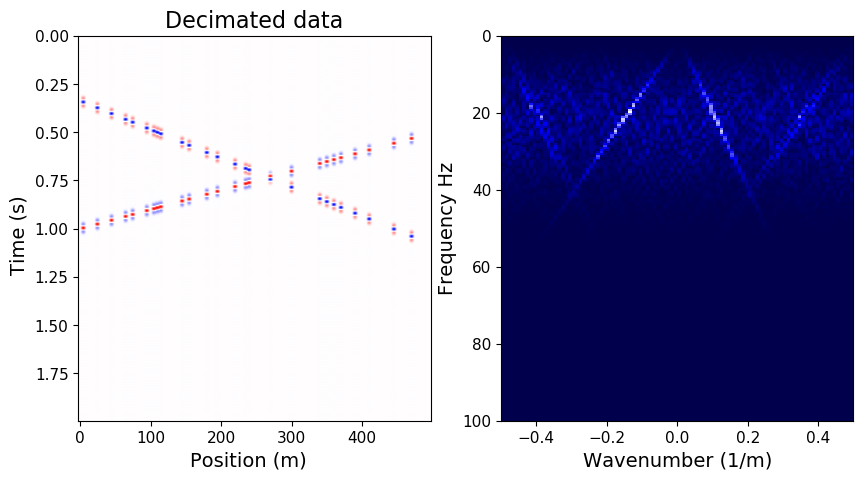

PyObject <matplotlib.image.AxesImage object at 0x14075f690>

In [15]:
figure(1, figsize=(10, 5))
subplot(121)
SeisPlotTX(dec,cmap="seismic",pclip=200,fignum=1,title="Decimated data",dy=0.004,ylabel="Time (s)", dx=5, xlabel="Position (m)")
subplot(122)
SeisPlotFK(dec, cmap="seismic", dy=0.004,hbox=5,pclip=200,fignum=1)

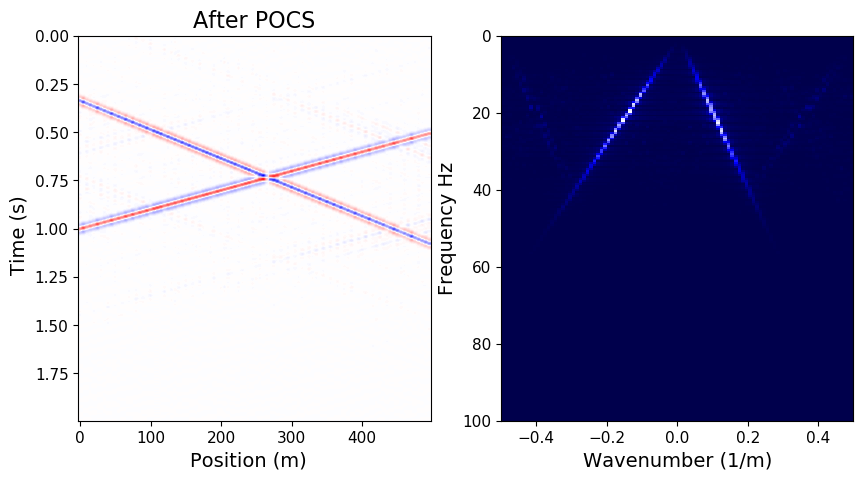

PyObject <matplotlib.image.AxesImage object at 0x1407362d0>

In [16]:
figure(2,figsize=(10, 5))
subplot(121)
SeisPlotTX(dpocs[:,:,1,1,1],cmap="seismic",fignum=2,pclip=200,title="After POCS",dy=0.004,ylabel="Time (s)", dx=5, xlabel="Position (m)")
subplot(122)
SeisPlotFK(dpocs[:,:,1,1,1],cmap="seismic",dy=0.004,fignum=2,pclip=200)